**In this notebook:** 
    
    - we plot the RR = exp(beta) from the coefficients of the poisson regression model

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import cm

import geopandas as gp 
from shapely.geometry import Point, LineString

import datetime as dt

import time

import scipy.stats as st

In [15]:
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.facecolor']='white'

# Load results

In [16]:
type_cont = "cont_overall"
#type_cont = "cont_work"
#type_cont = "cont_outside_home_exclnan"
#type_cont = "cont_outside_home_inclnan"

#data = pd.read_csv('./../data/processed/comixdata_part_cleaned+sep_munic+{}.csv'.format(type_cont))

In [17]:
pop_density = False
#pop_density = True

if pop_density == False:
    unadj = pd.read_csv("./../output/regression_output/output_unadj_{}.csv".format(type_cont))
    adj_inter = pd.read_csv("./../output/regression_output/output_adj_interaction_{}.csv".format(type_cont))
else:
    unadj = pd.read_csv("./../output/regression_output/output_unadj_{}_pop_density.csv".format(type_cont))
    adj_inter = pd.read_csv("./../output/regression_output/output_adj_interaction_{}_pop_density.csv".format(type_cont))   

In [18]:
adj_inter[['names', 'RRCI']]

,names,RRCI
0,(Intercept),4.21 (3.99-4.44)
1,age_group_part0-14,1.19 (1.07-1.33)
2,age_group_part15-24,1.28 (1.19-1.38)
3,age_group_part65+,0.84 (0.77-0.91)
4,education_level3_v3Tertiary level,0.99 (0.96-1.03)
5,sep3_quartilehighest,0.93 (0.90-0.97)
6,gender_responderMale,0.97 (0.95-1.00)
7,gender_responderOther,0.85 (0.64-1.12)
8,regionUrban,1.03 (1.00-1.06)
9,country_cat_birthEU,0.95 (0.92-0.98)


# plot

In [19]:
if pop_density == False:
    chosen_order = ['panel_wave', 'age_group_part', 'gender_responder', 'region',
                           'country_cat_birth', 
                           'household_income_3cat', 'household_size_cat_v2',
                           'employment_cat_v2', 'vaccinated', 'weekend', 
                           'education_level3_v3', 'sep3_quartile']
    
    ticklab = [r'${ \bf Survey \,\, wave }$' + ': Ref. A1', 'B1', 'C1', 'D1', 'E1', 'F1', 
           r'${ \bf Age \,\, group }$' + ': Ref. 25-64', '0-14', '15-24', '65+', 
           r'${ \bf Gender }$' + ': Ref. Female', 'Male', 'Other',
           r'${ \bf Region }$' + ': Ref. Rural','Urban',
           r'${ \bf Country \,\, of \,\, birth }$' + ': Ref. Switzerland', 'EU', 'Non-EU', 'Unknown',
           r'${ \bf Household \,\, income }$' + ': Ref. 0-5,000', '5,001-10,000', '10,000+', 'Preferred not to answer',
           r'${ \bf Household \,\, size }$' + ': Ref. 1', '2', '3+', 
           r'${ \bf Employment \,\, status }$' + ': Ref. employed', 'not employed', 
           r'${ \bf Vaccination \,\, status }$' + ': Ref. not vaccinated', 'vaccinated',
           r'${ \bf Type \,\, of \,\, day}$' + ': Ref. weekday', 'weekend',
           r'${ \bf Education \,\, level }$:', '(Ref. middle-low education)',
           'high education', 'high education, 0-14', 'high education, 15-24', 'high education, 25-64', 'high education, 65+',
           r'${ \bf SEP \,\, level}$:', '(Ref. low SEP)', 
           'high SEP', 'high SEP, 0-14', 'high SEP, 15-24',  'high SEP, 25-64', 'high SEP, 65+']
else:
    chosen_order = ['panel_wave', 'age_group_part', 'gender_responder', 'region',
                           'country_cat_birth', 
                           'household_income_3cat', 'household_size_cat_v2',
                           'employment_cat_v2', 'vaccinated', 'weekend', 'pop_densit_cat3',
                           'education_level3_v3', 'sep3_quartile']   
    
    ticklab = [r'${ \bf Survey \,\, wave }$' + ': Ref. A1', 'B1', 'C1', 'D1', 'E1', 'F1', 
           r'${ \bf Age \,\, group }$' + ': Ref. 25-64', '0-14', '15-24', '65+', 
           r'${ \bf Gender }$' + ': Ref. Female', 'Male', 'Other',
           r'${ \bf Region }$' + ': Ref. Rural','Urban',
           r'${ \bf Country \,\, of \,\, birth }$' + ': Ref. Switzerland', 'EU', 'Non-EU', 'Unknown',
           r'${ \bf Household \,\, income }$' + ': Ref. 0-5,000', '5,001-10,000', '10,000+', 'Preferred not to answer',
           r'${ \bf Household \,\, size }$' + ': Ref. 1', '2', '3+', 
           r'${ \bf Employment \,\, status }$' + ': Ref. employed', 'not employed', 
           r'${ \bf Vaccination \,\, status }$' + ': Ref. not vaccinated', 'vaccinated',
           r'${ \bf Type \,\, of \,\, day}$' + ': Ref. weekday', 'weekend',
           r'${ \bf Population \,\, density}$' + ': Ref. baseline', 'high', 'low',
           r'${ \bf Education \,\, level }$:', '(Ref. middle-low education)',
           'high education', 'high education, 0-14', 'high education, 15-24', 'high education, 25-64', 'high education, 65+',
           r'${ \bf SEP \,\, level}$:', '(Ref. low SEP)', 
           'high SEP', 'high SEP, 0-14', 'high SEP, 15-24',  'high SEP, 25-64', 'high SEP, 65+',]

In [20]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

/Users/lauradidomenico/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


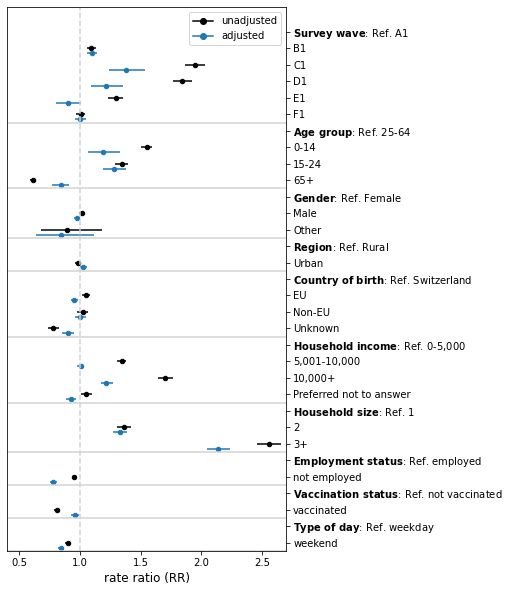

In [21]:
plt.figure(figsize=(5,10))

df = unadj.copy()

plt.plot([], [], '-o', color='black', label='unadjusted')
plt.plot([], [], '-o', color='tab:blue', label='adjusted')
#plt.scatter([], [], marker='*', color='gray', label='p<0.05')

plt.legend(frameon=True, loc='upper right', bbox_to_anchor=(1,1))

h = 0
for j,var in enumerate(chosen_order):
    if h>0:
        plt.axhline(y=h-0.5, color='lightgray') 
    h+=1
    
    sub = df[df['Variables']==var]
    sub = sub[sub['names']!='(Intercept)']
    
    if var in ['sep3_quartile', 'education_level3_v3']:
        h+=1

    for n in range(len(sub)):
        #h = sub.index[n]
        plt.scatter(sub['RR'].iloc[n], h, marker='o', s=20, color='black')
        plt.hlines(y=h, xmin=sub['CI.2.5.'].iloc[n],xmax=sub['CI.97.5.'].iloc[n], color='black')  
        
        # adjusted model
        ll = sub['names'].iloc[n][len('variable'):]
        #sub2=adj[adj['names'].str.contains(ll)]
        #sub2 = adj[adj['names']==var+ll]
        sub2 = adj_inter[adj_inter['names']==var+ll]
        if var in ['sep3_quartile', 'education_level3_v3']:
            h+=1
        if len(sub2)>0:
            plt.scatter(sub2['RR'].iloc[0], h+0.3, marker='o', s=20, color='tab:blue')
            plt.hlines(y=h+0.3, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='tab:blue')  
        else:
            sys.exit()
            
        #if sub['p.value'].iloc[n]<0.05:
        #    plt.scatter(0.3, h, marker='*', color='tab:blue')
        #if sub2['p.value'].iloc[0]<0.05:
        #    plt.scatter(0.3, h+0.3, marker='*', color='tab:orange')
            
        if var in ['education_level3_v3', 'sep3_quartile']:
            h+=1
            sub2 = adj_inter[adj_inter['names']=="age_group_part0-14+"+var+ll]
            plt.scatter(sub2['RR'].iloc[0], h+0.3, marker='o', s=20, color='tab:orange')
            plt.hlines(y=h+0.3, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='tab:orange') 
            h+=1
            sub2 = adj_inter[adj_inter['names']=="age_group_part15-24+"+var+ll]
            plt.scatter(sub2['RR'].iloc[0], h+0.3, marker='o', s=20, color='tab:orange')
            plt.hlines(y=h+0.3, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='tab:orange') 
            h+=1
            sub2 = adj_inter[adj_inter['names']=="age_group_part65++"+var+ll]
            plt.scatter(sub2['RR'].iloc[0], h+0.3, marker='o', s=20, color='tab:orange')
            plt.hlines(y=h+0.3, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='tab:orange') 
        
        h+=1

plt.axhline(y=h-0.5, color='lightgray')         

tickpos = np.arange(h)

plt.yticks(tickpos, ticklab)

plt.xlabel("rate ratio (RR)", fontsize=12)
#plt.title("overall contacts                                 \
#            \nweighted SEP                                         ", fontsize=12)

plt.axvline(x=1, color='lightgrey', linestyle='--')

if pop_density:
    plt.axis([0.4, 2.7, 34.5, -1.5])
else:
    plt.axis([0.4, 2.7, 31.5, -1.5])

plt.savefig("./../output/figures/estimated_RR_{}_popdensity{}.png".format(type_cont, pop_density), dpi=200, bbox_inches='tight')

plt.show()

## zoom in 

In [22]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

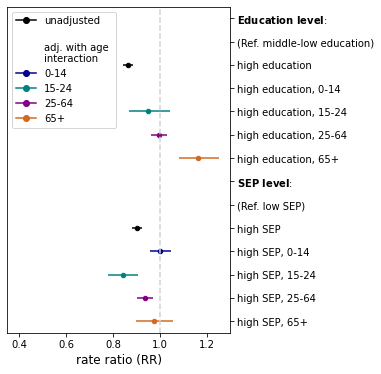

In [23]:
plt.figure(figsize=(4,6))

df = unadj.copy()

#plt.plot([], [], '-o', color='tab:blue', label='unadjusted')
#plt.plot([], [], '-o', color='tab:orange', label='adjusted')
#plt.scatter([], [], marker='*', color='gray', label='p<0.05')

plt.plot([], [], '-o', color='black', label='unadjusted')

plt.plot([], [], '-o', color='white', label='\nadj. with age \ninteraction')
plt.plot([], [], '-o', color='darkblue', label='0-14')
plt.plot([], [], '-o', color='teal', label='15-24')
plt.plot([], [], '-o', color='purple', label='25-64')
plt.plot([], [], '-o', color='chocolate', label='65+')

plt.legend(frameon=True, loc='upper left', bbox_to_anchor=(0,1), fontsize=10)

h = 0
for j,var in enumerate(chosen_order):
    #plt.axhline(y=h-0.5, color='lightgray') 
    h+=1
    
    sub = df[df['Variables']==var]
    sub = sub[sub['names']!='(Intercept)']
    
    if var in ['sep3_quartile', 'education_level3_v3']:
        h+=2

    for n in range(len(sub)):
        plt.scatter(sub['RR'].iloc[n], h-1, marker='o', s=20, color='black')
        plt.hlines(y=h-1, xmin=sub['CI.2.5.'].iloc[n],xmax=sub['CI.97.5.'].iloc[n], color='black')  
        
        # adjusted model
        ll = sub['names'].iloc[n][len('variable'):]
        #sub2=adj[adj['names'].str.contains(ll)]
        #sub2 = adj[adj['names']==var+ll]
        sub2 = adj_inter[adj_inter['names']==var+ll]
        #if var in ['sep3_quartile', 'education_level3_v2']:
        #    h+=1
        if len(sub2)>0:
            if var in ['sep3_quartile', 'education_level3_v3']:
                plt.scatter(sub2['RR'].iloc[0], h+2, marker='o', s=20, color='purple')
                plt.hlines(y=h+2, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='purple')  
        else:
            sys.exit()
            
        #if sub['p.value'].iloc[n]<0.05:
        #    plt.scatter(0.3, h, marker='*', color='tab:blue')
        #if sub2['p.value'].iloc[0]<0.05:
        #    plt.scatter(0.3, h+0.3, marker='*', color='tab:orange')
            
        if var in ['education_level3_v3', 'sep3_quartile']:
            h+=1
            sub2 = adj_inter[adj_inter['names']=="age_group_part0-14+"+var+ll]
            plt.scatter(sub2['RR'].iloc[0], h-1, marker='o', s=20, color='darkblue')
            plt.hlines(y=h-1, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='darkblue') 
            h+=1
            sub2 = adj_inter[adj_inter['names']=="age_group_part15-24+"+var+ll]
            plt.scatter(sub2['RR'].iloc[0], h-1, marker='o', s=20, color='teal')
            plt.hlines(y=h-1, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='teal') 
            h+=1
            sub2 = adj_inter[adj_inter['names']=="age_group_part65++"+var+ll]
            plt.scatter(sub2['RR'].iloc[0], h, marker='o', s=20, color='chocolate')
            plt.hlines(y=h, 
                       xmin=sub2['CI.2.5.'].iloc[0],
                       xmax=sub2['CI.97.5.'].iloc[0],  color='chocolate') 
        
        h+=1

#plt.axhline(y=h-0.5, color='lightgray')         

tickpos = np.arange(h)

plt.yticks(tickpos, ticklab)

plt.xlabel("rate ratio (RR)", fontsize=12)

plt.axvline(x=1, color='lightgrey', linestyle='--')

if pop_density:
    plt.axis([0.35, adj_inter['CI.97.5.'].iloc[31:].max()+0.05, 48.5, 34.5])
    #plt.axis([0.38, 1.28, 48.5, 34.5])
    
else:
    plt.axis([0.35, adj_inter['CI.97.5.'].iloc[31:].max()+0.05, 45.5, 31.5])
    #plt.axis([0.38, 1.28, 45.5, 31.5])

plt.savefig("./../output/figures/estimated_RR_{}_popdensity{}_zoom.png".format(type_cont, pop_density), dpi=200, bbox_inches='tight')

plt.show()

In [24]:
adj_inter[['names', 'RRCI']].iloc[[4,5]]

,names,RRCI
4,education_level3_v3Tertiary level,0.99 (0.96-1.03)
5,sep3_quartilehighest,0.93 (0.90-0.97)


In [25]:
adj_inter[['names', 'RRCI']].iloc[31:]

,names,RRCI
31,age_group_part0-14+education_level3_v3Tertiary...,NA (NA-NA)
32,age_group_part15-24+education_level3_v3Tertiar...,0.95 (0.87-1.04)
33,age_group_part65++education_level3_v3Tertiary ...,1.16 (1.08-1.25)
34,age_group_part0-14+sep3_quartilehighest,1.00 (0.96-1.05)
35,age_group_part15-24+sep3_quartilehighest,0.84 (0.78-0.91)
36,age_group_part65++sep3_quartilehighest,0.97 (0.90-1.05)
